In [1]:
# ! pip install --upgrade pip
# ! pip install sentence-transformers
! pip install ipywidgets --user

In [35]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [9]:
import pandas as pd

df = pd.read_excel("data/TextDataWithIDs.xlsx")

text = df["text"].to_list()

In [65]:
model_name = 'paraphrase-mpnet-base-v2' # 850 - 500
# model_name = "paraphrase-MiniLM-L6-v2"  # 2300 - 1400
# model_name = "paraphrase-albert-small-v2"  #12000 - 8000
# model_name = "paraphrase-distilroberta-base-v2"  #18000 - 11000
# model_name = "nli-roberta-base-v2"  # 22000 - 14000

embedder = SentenceTransformer(model_name)

In [66]:
corpus_embeddings = embedder.encode(text)

In [44]:
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [45]:
cluster_assignment

array([1, 2, 1, 4, 3, 2, 2, 0, 3, 4, 2, 3, 2, 3, 2, 0, 1, 0, 4, 3, 2, 4,
       3, 4, 1, 2, 3, 4, 2, 1, 1, 0, 0, 4, 1, 0, 1, 4, 3, 0, 0, 2, 1, 2,
       1, 1, 1, 3, 2, 4, 2, 4, 3, 0, 2, 2, 1, 0, 3, 4, 0, 3, 2, 4, 0, 3,
       3, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 4, 4, 4, 0, 4, 3, 0, 1,
       4, 4, 2, 0, 1, 2, 3, 3, 4, 4, 3, 4, 1, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       2, 0, 2, 1, 4, 0, 2, 1, 2, 0, 1, 0, 4, 3, 0, 3, 2, 0, 1, 3, 1, 3,
       4, 2, 4, 1, 1, 3, 4, 3, 2, 3, 0, 2, 0, 0, 0, 1, 0, 3, 2, 1, 4, 1,
       2, 1, 0, 2, 1, 4, 3, 4, 3, 0, 2, 2, 2, 2, 2, 1, 0], dtype=int32)

In [27]:
df[model_name] = cluster_assignment
df

Srvy_tgt_id      usr_id  \
0    a2u0W000002g4M5QAI  gi00211792   
1    a2u0W000004kpVgQAI  gi00034018   
2    a2u0W000004llw8QAA  gi00034018   
3    a2u0W000002g3dKQAQ  gi00461427   
4    a2u0W000004lMTCQA2  gi00461427   
..                  ...         ...   
166  a2u6T000005gW0WQAU  gi00461427   
167  a2u0W000002giz3QAA  gi00461427   
168  a2u0W000002gVAbQAM  gi00113025   
169  a2u0W000004ko1LQAQ  gi00231986   
170  a2u6T000002h4YnQAI  gi00216186   

                                                  text  cluster  \
0    Clinical utilization of HF PROs (eg., Kansas C...        2   
1    Expressed interest in the Quality Insight Seri...        4   
2    They are looking at optimization of care manag...        2   
3    Customer is interested in a value based contra...        4   
4    Customer is passionate about deprescribing ini...        4   
..                                                 ...      ...   
166  Customer is interested in improving adherence,...        4   
167  Follow up discussion on partnership between cu...        4   
168  Added Jardiance to inpatient formulary through...        3   
169  Cardiology Clinic Administrator. Interested in...        4   
170  Interested in learning which HF patient sub-po...        2   

     paraphrase-MiniLM-L6-v2  paraphrase-mpnet-base-v2  
0                          2                         1  
1                          4                         1  
2                          2                         3  
3                          4                         1  
4                          4                         2  
..                       ...                       ...  
166                        4                         1  
167                        4                         1  
168                        3                         4  
169                        4                         3  
170                        2                         0  

[171 rows x 6 columns]

In [28]:
df.to_excel("data/TextDataWithIDs-clustered.xlsx")

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


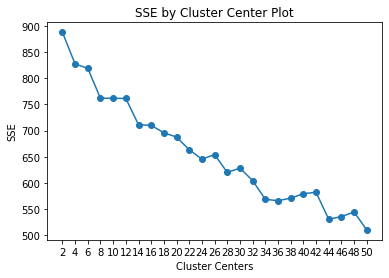

In [67]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=50, batch_size=50, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(corpus_embeddings, 50)